In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic scaling

In [2]:
d = pd.read_csv('../tables/d.csv', parse_dates=['Time_Start', 'Time_Stop', 'Time_Mid'])

In [9]:
# Sort for non-transit flights
d = d[d['TF'] == 0].reset_index(drop=True)
d_RI = d.dropna(subset=['RI']).reset_index(drop=True)
d_GF = d.dropna(subset=['GF']).reset_index(drop=True)
d_sp = d[d.season == 'spr'].reset_index(drop=True)
d_su = d[d.season == 'sum'].reset_index(drop=True)

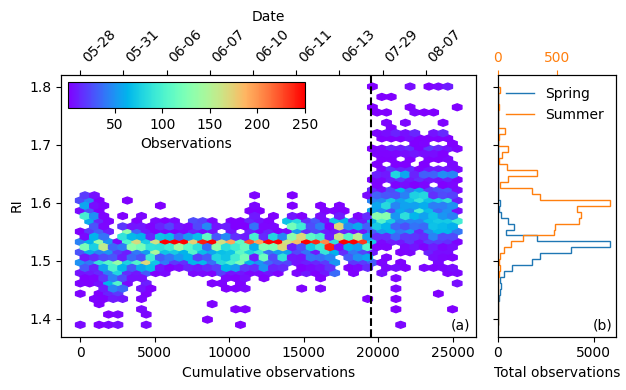

In [32]:
fig, axes = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [3.5, 1]}, figsize=(6.5, 4))
# Create a hexbin plot
ax = axes[0]
hb = ax.hexbin(d_RI.index, d_RI['RI'], gridsize=40, cmap='rainbow', mincnt=1, vmax=250)
ax.set_xlabel('Cumulative observations')
ax.set_ylabel('RI')
ax.axvline(d_sp.index[-1]+1, c='black', alpha=1, ls='--')
# Set the positions and labels for the top axis
index_ticks = np.arange(0, d_RI.index[-1], 2900)  # Every 5000 index points
date_labels = d_RI['Time_Mid'].iloc[index_ticks].dt.strftime('%m-%d')  # Format dates
ax2 = ax.twiny()
ax2.set_xticks(index_ticks)
ax2.set_xticklabels(date_labels, rotation=45, ha='left')  # Rotate labels for better readability
ax2.set_xlim(ax.get_xlim())  # Align the top axis limits with the bottom axis
ax2.set_xlabel('Date')
# Add text to the top-left corner
ax.text(0.94, 0.07, '(a)', transform=ax.transAxes, verticalalignment='top')

ax = axes[1]
ax.text(0.80, 0.07, '(b)', transform=ax.transAxes, verticalalignment='top')
# Assuming d_sp['RI'] and d_su['RI'] are your datasets
combined_data = np.concatenate([d_sp['RI'], d_su['RI']])
bin_edges = np.linspace(min(combined_data), max(combined_data), num=41)  # 40 bins

# Plot the first histogram with the defined bin edges
counts, _ = np.histogram(d_sp['RI'], bins=bin_edges)
lns1 = ax.stairs(counts, bin_edges, label='Spring', orientation='horizontal')

# Plot the second histogram with the same bin edges
counts, _ = np.histogram(d_su['RI'], bins=bin_edges)

ax2 = ax.twiny()

lns2 = ax2.stairs(counts, bin_edges, label='Summer', orientation='horizontal', color='tab:orange')

# added these three lines
lns = [lns1,lns2]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False)
ax.set_xlabel('Total observations')
ax2.tick_params(axis='x', colors='tab:orange')
#fig.subplots_adjust(hspace =-1.00)
plt.tight_layout()

cbaxes = inset_axes(axes[0], width="57%", height="10%", loc='upper left') 
cbar = plt.colorbar(hb, cax=cbaxes, label='Observations', location='top',pad=-.05)  # Add a colorbar for density
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')
plt.savefig('../figures/STM/RI_hexbin_mult.png', dpi=300, bbox_inches='tight')

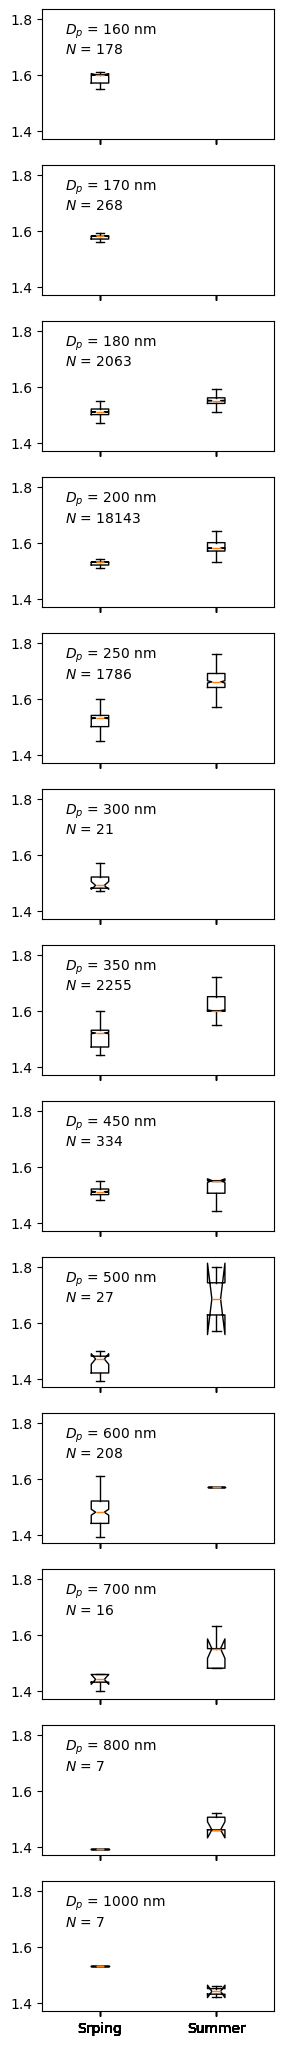

In [ ]:
fig,axes = plt.subplots(13, figsize=(3, 13*2), sharex=True, sharey=True)


Dps = sorted(d.Dp.unique())
for i in range(13):

    d_sp_i = d_sp[d_sp.Dp ==Dps[i]]
    d_su_i = d_su[d_su.Dp ==Dps[i]]

    axes[i].boxplot([d_sp_i['RI'], d_su_i['RI']], tick_labels=['Srping', 'Summer'], showfliers=False, notch=True)


    text = '$D_p$ = ' + str(int(Dps[i])) + ' nm\n' + '$N$ = ' + str(len(d_sp_i)+len(d_su_i))

    axes[i].text(0.1, .9, text, transform=axes[i].transAxes, verticalalignment='top')

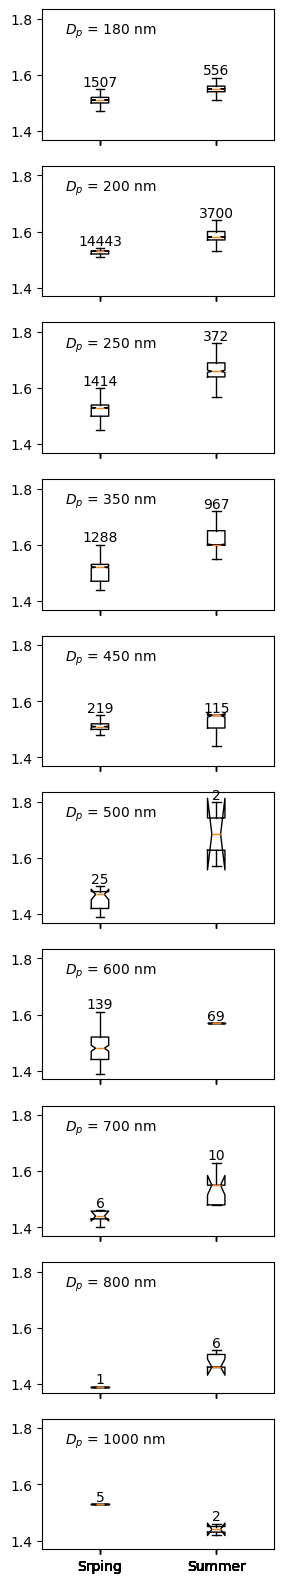

In [93]:
Dps = sorted(d_su['Dp'].unique())

fig,axes = plt.subplots(len(Dps), figsize=(3, len(Dps)*2), sharex=True, sharey=True)

for i in range(len(Dps)):

    d_sp_i = d_sp[d_sp.Dp ==Dps[i]]
    d_su_i = d_su[d_su.Dp ==Dps[i]]

    bp = axes[i].boxplot([d_sp_i['RI'], d_su_i['RI']], tick_labels=['Srping', 'Summer'], showfliers=False, notch=True)


    text = '$D_p$ = ' + str(int(Dps[i])) + ' nm'

    axes[i].text(0.1, .9, text, transform=axes[i].transAxes, verticalalignment='top')

    
    # The top whisker for the first box (Spring) is the second line (index 1)
    y_max_sp = bp['whiskers'][1].get_ydata()[1]  # upper whisker value of Spring (box 1)
    y_max_su = bp['whiskers'][3].get_ydata()[1]  # upper whisker value of Spring (box 1)

    axes[i].text(1, y_max_sp, str(len(d_sp_i['RI'])), ha='center', va='bottom')
    axes[i].text(2, y_max_su, str(len(d_su_i['RI'])), ha='center', va='bottom')



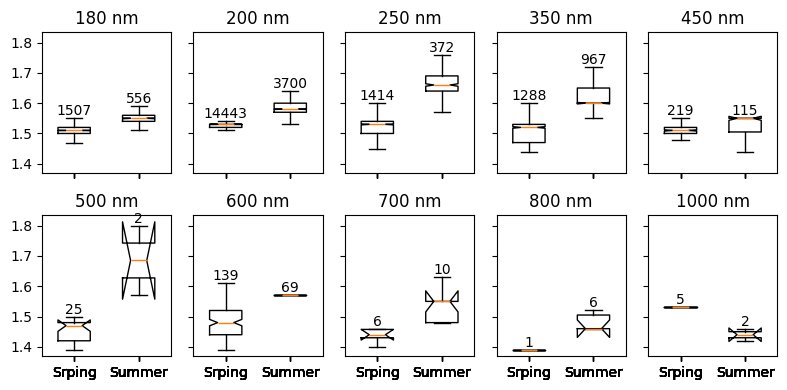

In [116]:
Dps = sorted(d_su['Dp'].unique())

fig,axes = plt.subplots(2,5, figsize=(8,4), sharex=True, sharey=True)
axf = axes.flatten()
for i in range(len(Dps)):
    ax = axf[i]
    d_sp_i = d_sp[d_sp.Dp ==Dps[i]]
    d_su_i = d_su[d_su.Dp ==Dps[i]]

    bp = ax.boxplot([d_sp_i['RI'], d_su_i['RI']], tick_labels=['Srping', 'Summer'], showfliers=False, notch=True, widths=(0.5, 0.5))


    text = str(int(Dps[i])) + ' nm'

    #ax.text(0.1, .99, text, transform=ax.transAxes, verticalalignment='top')
    ax.set_title(text)
    
    # The top whisker for the first box (Spring) is the second line (index 1)
    y_max_sp = bp['whiskers'][1].get_ydata()[1]  # upper whisker value of Spring (box 1)
    y_max_su = bp['whiskers'][3].get_ydata()[1]  # upper whisker value of Spring (box 1)

    ax.text(1, y_max_sp, str(len(d_sp_i['RI'])), ha='center', va='bottom')
    ax.text(2, y_max_su, str(len(d_su_i['RI'])), ha='center', va='bottom')

fig.tight_layout()
fig.savefig('../figures/STM/RI_boxplot_mult.png', dpi=300, bbox_inches='tight')